In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
NUMBA_DISABLE_JIT = 1

from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, ExponFrag, AlwaysN
from PySDM.physics.constants import si
import PySDM.physics.constants as const
from PySDM.physics.trivia import Trivia

## Problem Description
The problem is that the code will hang sometimes for collisions. This is more likely if the collection efficiency (Ec) is lower, or more complex like the Berry1967 kernel. It also happens reliably for a fragmentation function which is stochastic (gaussian or exponential) even with limiters in place, versus a constant number of fragments. Finally, it happens more reliably when more superdroplets are used.

overflow
	file: /Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/methods/collisions_methods.py
overflow
	file: /Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/methods/collisions_methods.py
overflow
	file: /Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/methods/collisions_methods.py
overflow
	file: /Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/methods/collisions_methods.py
overflow
	file: /Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/methods/collisions_methods.py
overflow
	file: /Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/methods/collisions_methods.py


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.41789750e+06 0.00000000e+00 3.08587320e+06 3.32024300e+05]
 [2.49506440e+06 0.00000000e+00 2.19721920e+06 2.97845200e+05]
 [1.77486910e+06 0.00000000e+00 1.63815220e+06 1.36716900e+05]
 [1.15710940e+06 0.00000000e+00 9.74817000e+05 1.87174300e+05]
 [6.22571200e+05 0.00000000e+00 5.81067500e+05 4.15037000e+04]
 [2.88053200e+05 0.00000000e+00 2.74839700e+05 1.32135000e+04]
 [1.32827300e+05 0.00000000e+00 1.11790600e+05 2.12692000e+04]
 [8.53149000e+04 0.00000000e+00 7.87435000e+04 9.21430000e+03]
 [1.76373700e+05 0.00000000e+00 1.70918300e+05 2.08337800e+05]
 [5.95806549e+12 0.00000000e+00 5.67919858e+12 1.02749827e+13]]


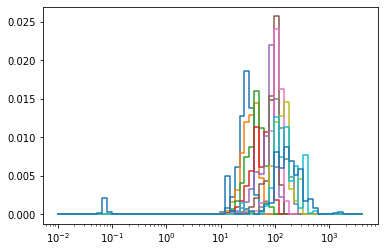

In [3]:
# DEBUGGING
settings = Settings()
settings.warn_overflows = True
settings.adaptive = True        # I haven't found a strong correlation whether this makes a difference
t_steps = np.linspace(0,100,11,dtype="int") # time steps for outputting collision, collision deficit, coalescence, breakup rates

Ec = 0.9
settings.coal_eff = ConstEc(Ec = Ec)
#settings.coal_eff = Berry1967()
settings.n_sd = 2**8

mu = Trivia.volume(const, 100 * si.um)
vmin = Trivia.volume(const, 1 * si.um)
nfmax = 10
settings.fragmentation = Gaussian(mu = mu, sigma = mu / 4, vmin=vmin, nfmax=nfmax) # with limiters
#settings.fragmentation = Gaussian(mu = mu, sigma = mu / 4) # without limiters
#settings.fragmentation = ExponFrag(scale = mu)
(x,y,rates) = run_box_breakup(settings, t_steps)
print(rates)
for (j, step) in enumerate(t_steps):
        lbl = 'Ec = ' + str(Ec)
        pyplot.step(x,y[j]*settings.rho)
pyplot.xscale("log")